In [1]:
import pandas as pd
import numpy as np
from numpy import array, matmul, dot, transpose
from numpy.linalg import eig, eigh, eigvals, eigvalsh
from pandas import DataFrame
from numpy import int64
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
from scipy.linalg import svd

- The term 'apple' is associated with the colours red, green, yellow, orange, purple and pink.
- The term 'banana' is associated with the colours red, green, yellow, brown, white, pink and blue.
- The term 'pepper' is associated with the colours red, green, yellow, orange, brown, purple and black.
- The term 'pear' is associated with the colours red, green, yellow, brown, white and black.
- The term 'watermelon' is associated with the colours red, green, yellow, orange, white, pink and black.
- The term 'berry' is associated with the colours red, green, orange, purple, pink, blue and black.
- The term 'tomato' is associated with the coloursred, green, yellow, orange, brown, white, purple and blue.
- The term 'kiwi' is associated with the colours green, yellow, brown, white and purple.
- The term 'peach' is associated with the colours green, yellow, orange, white and pink.
- The term 'fig' is associated with the colours green, yellow, brown, purple and black.

In [6]:
df = pd.read_csv(r"matrix.csv")
df.set_index('page', inplace=True)
df.index.name = None

products = df.index.tolist()
customers = df.columns.values.tolist()

df

,red,green,yellow,orange,brown,white,purple,pink,blue,black
apple,1,1,1,1,0,0,1,1,0,0
banana,1,1,1,0,1,1,0,1,1,0
pepper,1,1,1,1,1,0,1,0,0,1
pear,1,1,1,0,1,1,0,0,0,1
watermelon,1,1,1,1,0,1,0,1,0,1
berry,1,1,0,1,0,0,1,1,1,1
tomato,1,1,1,1,1,1,1,0,1,0
kiwi,0,1,1,0,1,1,1,0,0,0
peach,0,1,1,1,0,1,0,1,0,0
fig,0,1,1,0,1,0,1,0,0,1


In [7]:
X = df.copy().to_numpy()
u, s, vT = svd(X)
u12 = u[:, :2]
v12 = vT[:2,:].T
u12 = np.abs(u12)
v12 = np.abs(v12)

u12, v12

(array([[0.31173882, 0.34764641],
        [0.33423993, 0.05641649],
        [0.3555538 , 0.11244074],
        [0.31135585, 0.32738074],
        [0.34808022, 0.31605938],
        [0.30669961, 0.48477442],
        [0.38624953, 0.12563842],
        [0.26478396, 0.44899035],
        [0.25875512, 0.23390883],
        [0.25741729, 0.38619636]]),
 array([[0.35474373, 0.21315156],
        [0.47243661, 0.03022556],
        [0.4262159 , 0.22644598],
        [0.29644547, 0.46317825],
        [0.28778353, 0.58977027],
        [0.28685885, 0.16533002],
        [0.28369082, 0.09748599],
        [0.23502423, 0.5367092 ],
        [0.15480102, 0.1225307 ],
        [0.23797697, 0.01019366]]))

In [8]:
C = u12.T @ X.T

norms_C = np.linalg.norm(C, axis=0)
C_normalized = C / norms_C

D = v12.T @ X

norms_D = np.linalg.norm(D, axis=0)
D_normalized = D / norms_D

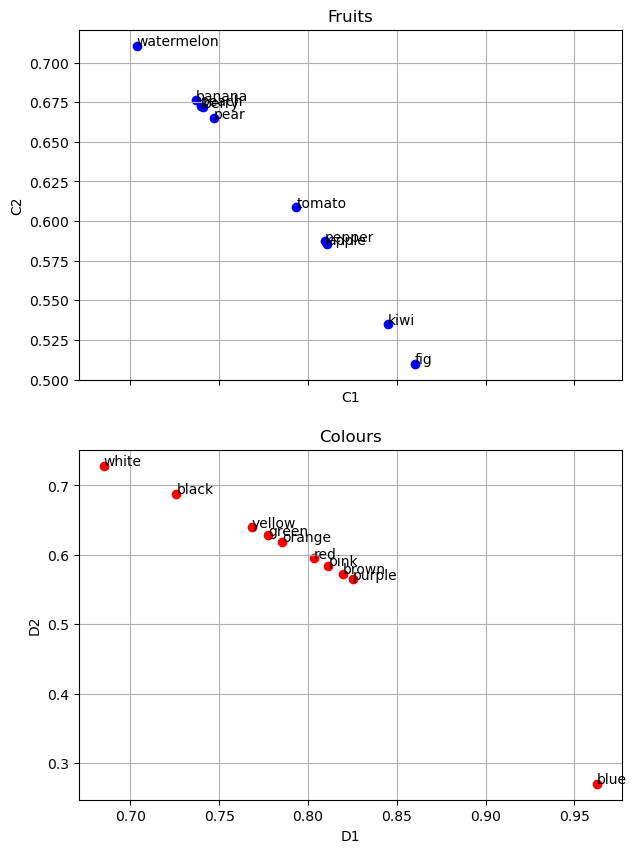

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 10))

ax[0].scatter(C_normalized[0, :], C_normalized[1, :], marker='o', color='b')
ax[0].set_title("Fruits")
ax[0].set_xlabel("C1")
ax[0].set_ylabel("C2")
#ax[0].set_xlim(0,1)
#ax[0].set_ylim(-1,1)
ax[0].grid(True)

for i, product in enumerate(products):
    ax[0].annotate(product, (C_normalized[0, i], C_normalized[1, i]))
    
    

ax[1].scatter(D_normalized[0, :], D_normalized[1, :], marker='o', color='r')
ax[1].set_title("Colours")
ax[1].set_xlabel("D1")
ax[1].set_ylabel("D2")
#ax[1].set_xlim(0,1)
#ax[1].set_ylim(-1,1)
ax[1].grid(True)

for i, customer in enumerate(customers):
    ax[1].annotate(customer, (D_normalized[0, i], D_normalized[1, i]))

The results are as expected since terms associated with the same color tend to cluster together, reflecting the relationships defined in the term-document matrix and, therefore, are more aligned in the same direction.